In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

X = iris.data
Y = iris.target

In [3]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data["Type"] = Y
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
import seaborn as sns
sns.set()

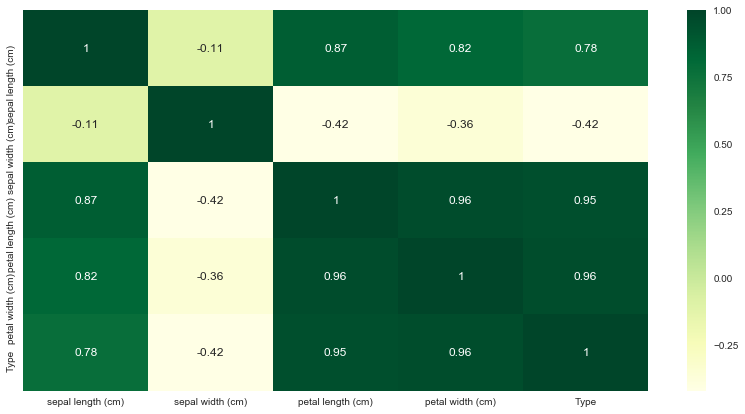

In [7]:
cor = data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor, cmap = 'YlGn',annot=True)

In [8]:
from sklearn.decomposition import PCA

In [9]:
f = ['sepal length (cm)','petal length (cm)','petal width (cm)']
pca = PCA(n_components=1)  

d = pca.fit_transform(data[f])
d.shape

data['NEW']=d
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,NEW
0,5.1,3.5,1.4,0.2,0,-2.656097
1,4.9,3.0,1.4,0.2,0,-2.728993
2,4.7,3.2,1.3,0.2,0,-2.887767
3,4.6,3.1,1.5,0.2,0,-2.752460
4,5.0,3.6,1.4,0.2,0,-2.692545


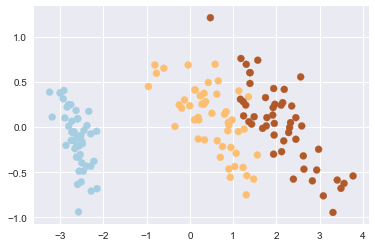

In [10]:
pca1 = PCA(n_components=2)  

d1 = pca1.fit_transform(data[f])
d1.shape


plt.scatter(d1[:,0], d1[:,1], c = Y, cmap = 'Paired')

In [11]:
from sklearn import preprocessing, linear_model
from sklearn.svm import SVC

C = SVC(gamma = 'auto',random_state=87)
C.fit(data.iloc[:,[1,-1]],data.iloc[:,-2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=87, shrinking=True,
  tol=0.001, verbose=False)

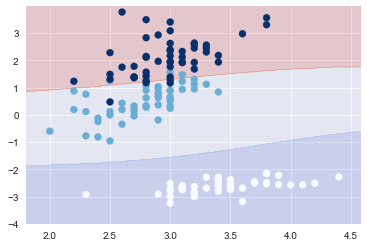

In [15]:
x = np.arange(1.8,4.6,0.02)
y = np.arange(-4,4,0.02)

X, Y = np.meshgrid(x,y)
X1 = np.c_[X.ravel(),Y.ravel()]

y_predict= C.predict(X1)
plt.contourf(X, Y, y_predict.reshape(X.shape), cmap="coolwarm", alpha = 0.2)
plt.scatter(data.iloc[:,1],(data.iloc[:,-1]), c = data.iloc[:,-2], cmap="Blues")